In [1]:
from sklearn.model_selection import train_test_split
import tensorflow as tf

In [2]:
epoch = 30

In [3]:
image_size=(48,48)

path_train = r"/Users/user/Projekt/output/train"

train_dataset = tf.keras.utils.image_dataset_from_directory(path_train,
labels="inferred",
label_mode="categorical",
color_mode="grayscale",
image_size=image_size,
shuffle=True
)

path_valid = r"/Users/user/Projekt/output/val"
val_dataset=train_dataset = tf.keras.utils.image_dataset_from_directory(path_valid,
labels="inferred",
label_mode="categorical",
color_mode="grayscale",
image_size=image_size,
shuffle=True
)

test_dataset = tf.keras.utils.image_dataset_from_directory(
    "/Users/user/Projekt/output/test",
labels="inferred",
label_mode="categorical",
color_mode="grayscale",
image_size=image_size,
shuffle=True
)

Found 50706 files belonging to 7 classes.
Found 6335 files belonging to 7 classes.
Found 6346 files belonging to 7 classes.


In [92]:
import splitfolders

#splitfolders.ratio('/Users/user/Projekt/img_second/train/',output="output",seed=1337,ratio=(0.8,0.1,0.1))

Copying files: 63387 files [02:09, 488.59 files/s]


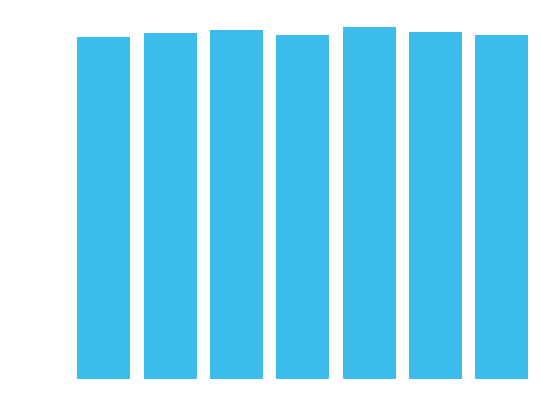

In [95]:
import os, os.path
from pathlib import Path
import matplotlib.pyplot as plt
global_path ="C:/Users/user/Projekt/images_aug"
emotions = {
    "angry":0,
    "disgust":0,
    "fear":0,
    "happy":0,
    "neutral":0,
    "sad":0,
    "surprise":0}
for train_or_valid in ["train","validation"]:
    for emotion,count in emotions.items():
        dir_path = f"{global_path}/{train_or_valid}/{emotion}"

        file_count = len([name for name in os.listdir(dir_path)])
       
        emotions[emotion]=emotions[emotion]+file_count
            
ax = plt.axes()    
ax.spines['bottom'].set_color('white')
ax.spines['left'].set_color('white')
ax.spines["top"].set_alpha(0)
ax.spines["right"].set_alpha(0)


plt.bar(*zip(*emotions.items()),color='#3cbceb')

plt.tick_params(axis='x',labelcolor='white',color='white')
plt.tick_params(axis='y',labelcolor='white',color='white')

plt.savefig("class_number_no_aug",transparent=True)

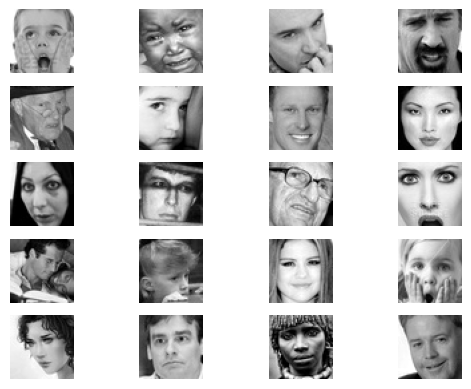

In [76]:
import matplotlib.pyplot as plt
import numpy as np

for images, labels in train_dataset.take(1):
    for i in range(20): 
         ax = plt.subplot(5, 4, i + 1)
        
         plt.imshow(np.array(images[i]).astype("uint8"),cmap="gray")
        # plt.title((labels[i]))
         plt.axis("off")
   # plt.subplots_adjust(left=0.1,bottom=0.1,right=0.9,top=0.9,wspace=0.2,hspace=0.1)
    plt.savefig("aug_images",transparent=True)


In [77]:
print(train_dataset.take(1))

<_TakeDataset element_spec=(TensorSpec(shape=(None, 48, 48, 1), dtype=tf.float32, name=None), TensorSpec(shape=(None, 7), dtype=tf.float32, name=None))>


In [4]:
def draw_chart(history,figname):
    
    fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(10, 5))
    loss = history.history["loss"]
    val_loss = history.history["val_loss"]
    accuracy = history.history["accuracy"]
    val_accuracy = history.history["val_accuracy"]

    epoch_range = range(len(loss))

    
    ax1.spines['bottom'].set_color('white')
    ax1.spines['left'].set_color('white')
    ax1.spines["top"].set_alpha(0)
    ax1.spines["right"].set_alpha(0)

    #plt.tick_params(axis='x',labelcolor='white',color='white')#
    #plt.tick_params(axis='y',labelcolor='white',color='white')#
    
    
    ax1.plot(epoch_range, loss, label="Training Loss",color='white')
    ax1.plot(epoch_range, val_loss, label="Validation Loss",color='#3cbceb')
    ax1.set_xlabel("Epoch")
    ax1.set_ylabel("Loss")
    

    ax1.xaxis.label.set_color('white')
    ax1.yaxis.label.set_color('white')

    ax1.tick_params(axis='x',labelcolor='white',color='white')
    ax1.tick_params(axis='y',labelcolor='white',color='white') 



    ax1.legend()
    

    ax1.grid(True)
    
    
    ax2.spines['bottom'].set_color('white')
    ax2.spines['left'].set_color('white')
    ax2.spines["top"].set_alpha(0)
    ax2.spines["right"].set_alpha(0)
   
    
    
    ax2.plot(epoch_range, accuracy, label="Training Accuracy",color='white')
    ax2.plot(epoch_range, val_accuracy, label="Validation Accuracy",color='#3cbceb')
    ax2.set_xlabel("Epoch")
    ax2.set_ylabel("Accuracy")
    
    ax2.tick_params(axis='x',labelcolor='white',color='white')
    ax2.tick_params(axis='y',labelcolor='white',color='white') 

    #plt.tick_params(axis='x',labelcolor='white',color='white')#
    #plt.tick_params(axis='y',labelcolor='white',color='white')#


    ax2.xaxis.label.set_color('white')
    ax2.yaxis.label.set_color('white')

    ax2.legend()
  
    ax2.grid(True)
    plt.savefig(figname,transparent=True)
    

In [5]:
def modeling(model,figname,train_data,valid_data,number_of_epochs):
   model.compile(optimizer=tf.keras.optimizers.Nadam(learning_rate=0.001),loss="categorical_crossentropy", metrics=["accuracy"])

   history = model.fit(train_data,validation_data=valid_data,epochs=number_of_epochs)

   draw_chart(history,figname)

   return model

# BUDOWA SIECI NEURONOWEJ

## Model 1

Epoch 1/30
198/198 ━━━━━━━━━━━━━━━━━━━━ 34s 155ms/step - accuracy: 0.1591 - loss: 7.3008 - val_accuracy: 0.2101 - val_loss: 1.8993
Epoch 2/30
198/198 ━━━━━━━━━━━━━━━━━━━━ 28s 142ms/step - accuracy: 0.1911 - loss: 1.9200 - val_accuracy: 0.2595 - val_loss: 1.8309
Epoch 3/30
198/198 ━━━━━━━━━━━━━━━━━━━━ 29s 147ms/step - accuracy: 0.2382 - loss: 1.8450 - val_accuracy: 0.2941 - val_loss: 1.7605
Epoch 4/30
198/198 ━━━━━━━━━━━━━━━━━━━━ 32s 164ms/step - accuracy: 0.3020 - loss: 1.7473 - val_accuracy: 0.3604 - val_loss: 1.6572
Epoch 5/30
198/198 ━━━━━━━━━━━━━━━━━━━━ 32s 161ms/step - accuracy: 0.3772 - loss: 1.6327 - val_accuracy: 0.4082 - val_loss: 1.5825
Epoch 6/30
198/198 ━━━━━━━━━━━━━━━━━━━━ 33s 168ms/step - accuracy: 0.4630 - loss: 1.4251 - val_accuracy: 0.4960 - val_loss: 1.4027
Epoch 7/30
198/198 ━━━━━━━━━━━━━━━━━━━━ 30s 149ms/step - accuracy: 0.5631 - loss: 1.1888 - val_accuracy: 0.5836 - val_loss: 1.1779
Epoch 8/30
198/198 ━━━━━━━━━━━━━━━━━━━━ 32s 160ms/step - accuracy: 0.6626 - loss: 0

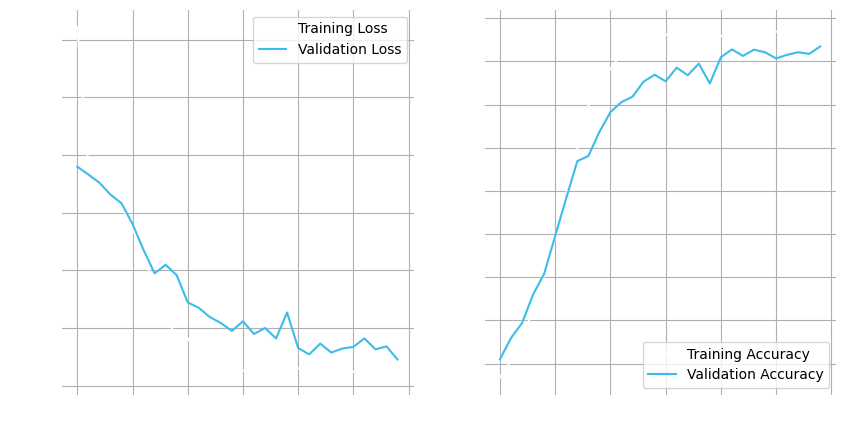

In [96]:
model1 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(48, 48,1)),
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), padding="same", activation="relu"),
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), padding="same", activation="relu"),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),

    tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), padding="same", activation="relu"),
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), padding="same", activation="relu"),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation="relu"),
    tf.keras.layers.Dense(7, activation="softmax")
])

model1 = modeling(model1,"model1.png",train_dataset,val_dataset,epoch)

## MODEL 2 Batch Normalisation

Epoch 1/30
198/198 ━━━━━━━━━━━━━━━━━━━━ 46s 212ms/step - accuracy: 0.1883 - loss: 3.3622 - val_accuracy: 0.2642 - val_loss: 1.8494
Epoch 2/30
198/198 ━━━━━━━━━━━━━━━━━━━━ 38s 192ms/step - accuracy: 0.2993 - loss: 1.7959 - val_accuracy: 0.3257 - val_loss: 1.7311
Epoch 3/30
198/198 ━━━━━━━━━━━━━━━━━━━━ 40s 202ms/step - accuracy: 0.3772 - loss: 1.6286 - val_accuracy: 0.4068 - val_loss: 1.5727
Epoch 4/30
198/198 ━━━━━━━━━━━━━━━━━━━━ 48s 243ms/step - accuracy: 0.4859 - loss: 1.3759 - val_accuracy: 0.4856 - val_loss: 1.3901
Epoch 5/30
198/198 ━━━━━━━━━━━━━━━━━━━━ 48s 244ms/step - accuracy: 0.6133 - loss: 1.0795 - val_accuracy: 0.5500 - val_loss: 1.3851
Epoch 6/30
198/198 ━━━━━━━━━━━━━━━━━━━━ 41s 206ms/step - accuracy: 0.7524 - loss: 0.7073 - val_accuracy: 0.6461 - val_loss: 1.0088
Epoch 7/30
198/198 ━━━━━━━━━━━━━━━━━━━━ 37s 186ms/step - accuracy: 0.8513 - loss: 0.4278 - val_accuracy: 0.8043 - val_loss: 0.5514
Epoch 8/30
198/198 ━━━━━━━━━━━━━━━━━━━━ 41s 208ms/step - accuracy: 0.9298 - loss: 0

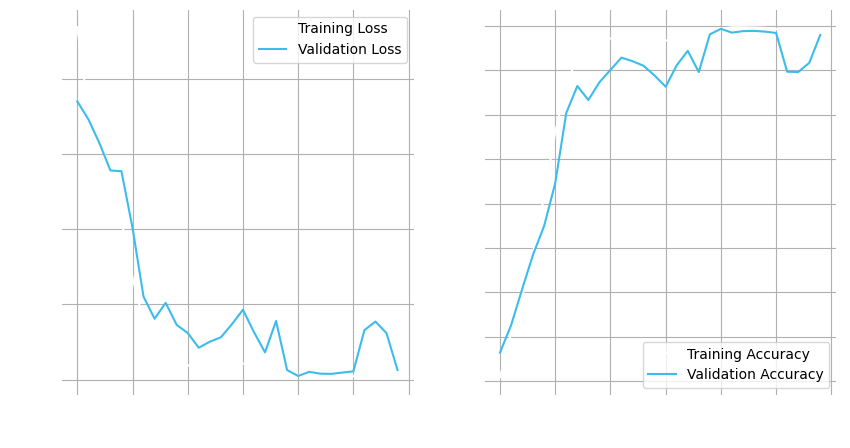

In [97]:
model2 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(48, 48,1)),
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), padding="same", activation="relu"),
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), padding="same", activation="relu"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
  
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), padding="same", activation="relu"),
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), padding="same", activation="relu"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation="relu"),
    tf.keras.layers.Dense(7, activation="softmax")
])

model2 = modeling(model2,"model2.png",train_dataset,val_dataset,epoch)

## MODEL 3 - PADDING

Epoch 1/30
198/198 ━━━━━━━━━━━━━━━━━━━━ 52s 199ms/step - accuracy: 0.2266 - loss: 2.6712 - val_accuracy: 0.1747 - val_loss: 2.1076
Epoch 2/30
198/198 ━━━━━━━━━━━━━━━━━━━━ 37s 185ms/step - accuracy: 0.3375 - loss: 1.7372 - val_accuracy: 0.4420 - val_loss: 1.5066
Epoch 3/30
198/198 ━━━━━━━━━━━━━━━━━━━━ 36s 179ms/step - accuracy: 0.4462 - loss: 1.4731 - val_accuracy: 0.4008 - val_loss: 1.6082
Epoch 4/30
198/198 ━━━━━━━━━━━━━━━━━━━━ 27s 137ms/step - accuracy: 0.5995 - loss: 1.1164 - val_accuracy: 0.5487 - val_loss: 1.2474
Epoch 5/30
198/198 ━━━━━━━━━━━━━━━━━━━━ 27s 136ms/step - accuracy: 0.7742 - loss: 0.6602 - val_accuracy: 0.8074 - val_loss: 0.5564
Epoch 6/30
198/198 ━━━━━━━━━━━━━━━━━━━━ 28s 139ms/step - accuracy: 0.8909 - loss: 0.3417 - val_accuracy: 0.8253 - val_loss: 0.4959
Epoch 7/30
198/198 ━━━━━━━━━━━━━━━━━━━━ 27s 136ms/step - accuracy: 0.9404 - loss: 0.1874 - val_accuracy: 0.7825 - val_loss: 0.6498
Epoch 8/30
198/198 ━━━━━━━━━━━━━━━━━━━━ 27s 137ms/step - accuracy: 0.9644 - loss: 0

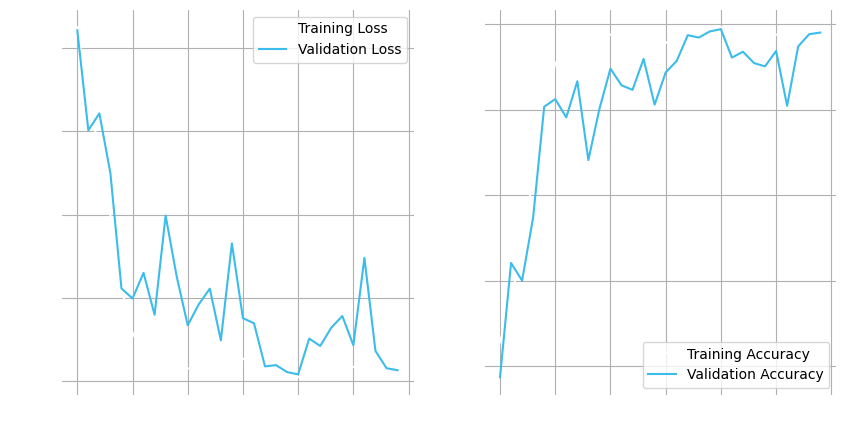

In [98]:
model3 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(48, 48,1)),
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), padding="valid", activation="relu"),
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), padding="valid", activation="relu"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
  
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), padding="valid", activation="relu"),
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), padding="valid", activation="relu"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation="relu"),
    tf.keras.layers.Dense(7, activation="softmax")
])

model3 = modeling(model3,"model3.png",train_dataset,val_dataset,epoch)

# Model 4 - ZMIANA WIELKOŚCI KERNELA

Epoch 1/30
198/198 ━━━━━━━━━━━━━━━━━━━━ 39s 178ms/step - accuracy: 0.2481 - loss: 2.6222 - val_accuracy: 0.2205 - val_loss: 1.8862
Epoch 2/30
198/198 ━━━━━━━━━━━━━━━━━━━━ 38s 189ms/step - accuracy: 0.4167 - loss: 1.5312 - val_accuracy: 0.3108 - val_loss: 1.8634
Epoch 3/30
198/198 ━━━━━━━━━━━━━━━━━━━━ 37s 188ms/step - accuracy: 0.5856 - loss: 1.1248 - val_accuracy: 0.5094 - val_loss: 1.3762
Epoch 4/30
198/198 ━━━━━━━━━━━━━━━━━━━━ 38s 191ms/step - accuracy: 0.7551 - loss: 0.6900 - val_accuracy: 0.6846 - val_loss: 0.8900
Epoch 5/30
198/198 ━━━━━━━━━━━━━━━━━━━━ 37s 185ms/step - accuracy: 0.8826 - loss: 0.3636 - val_accuracy: 0.5433 - val_loss: 1.7252
Epoch 6/30
198/198 ━━━━━━━━━━━━━━━━━━━━ 37s 186ms/step - accuracy: 0.9355 - loss: 0.2010 - val_accuracy: 0.7096 - val_loss: 0.8735
Epoch 7/30
198/198 ━━━━━━━━━━━━━━━━━━━━ 36s 184ms/step - accuracy: 0.9637 - loss: 0.1220 - val_accuracy: 0.7664 - val_loss: 0.6809
Epoch 8/30
198/198 ━━━━━━━━━━━━━━━━━━━━ 37s 186ms/step - accuracy: 0.9630 - loss: 0

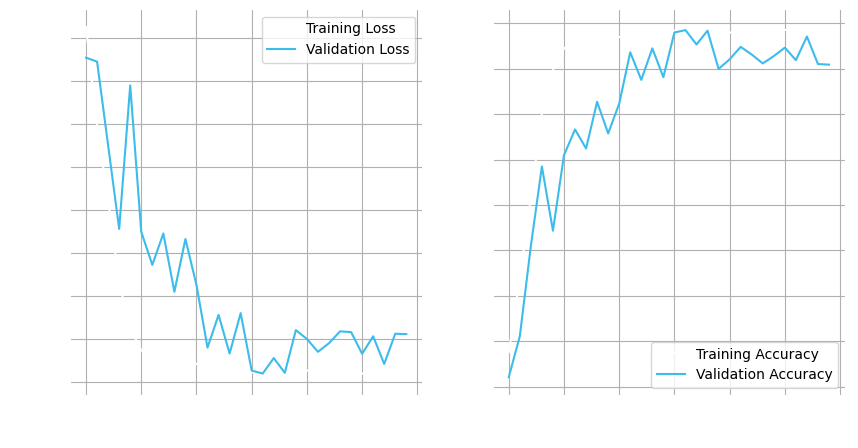

In [101]:
model4 = tf.keras.Sequential([
     tf.keras.layers.Input(shape=(48, 48,1)),
    tf.keras.layers.Conv2D(filters=32, kernel_size=(2, 2), padding="valid", activation="relu"),
    tf.keras.layers.Conv2D(filters=32, kernel_size=(2, 2), padding="valid", activation="relu"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
  
    tf.keras.layers.Conv2D(filters=64, kernel_size=(2, 2), padding="valid", activation="relu"),
    tf.keras.layers.Conv2D(filters=64, kernel_size=(2, 2), padding="valid", activation="relu"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation="relu"),
    tf.keras.layers.Dense(7, activation="softmax")
])

model4 = modeling(model4,"model4.png",train_dataset,val_dataset,epoch)

## MODEL 7 - Więcej filtrów

Epoch 1/30
198/198 ━━━━━━━━━━━━━━━━━━━━ 78s 373ms/step - accuracy: 0.1952 - loss: 3.1288 - val_accuracy: 0.2775 - val_loss: 1.9286
Epoch 2/30
198/198 ━━━━━━━━━━━━━━━━━━━━ 87s 441ms/step - accuracy: 0.2852 - loss: 1.8405 - val_accuracy: 0.1825 - val_loss: 2.0682
Epoch 3/30
198/198 ━━━━━━━━━━━━━━━━━━━━ 77s 387ms/step - accuracy: 0.3260 - loss: 1.7450 - val_accuracy: 0.3839 - val_loss: 1.6231
Epoch 4/30
198/198 ━━━━━━━━━━━━━━━━━━━━ 73s 369ms/step - accuracy: 0.3646 - loss: 1.6303 - val_accuracy: 0.3411 - val_loss: 1.9228
Epoch 5/30
198/198 ━━━━━━━━━━━━━━━━━━━━ 73s 368ms/step - accuracy: 0.4311 - loss: 1.5049 - val_accuracy: 0.4747 - val_loss: 1.4152
Epoch 6/30
198/198 ━━━━━━━━━━━━━━━━━━━━ 74s 373ms/step - accuracy: 0.4892 - loss: 1.3624 - val_accuracy: 0.5631 - val_loss: 1.1910
Epoch 7/30
198/198 ━━━━━━━━━━━━━━━━━━━━ 73s 368ms/step - accuracy: 0.5495 - loss: 1.2191 - val_accuracy: 0.6234 - val_loss: 1.0643
Epoch 8/30
198/198 ━━━━━━━━━━━━━━━━━━━━ 73s 367ms/step - accuracy: 0.6063 - loss: 1

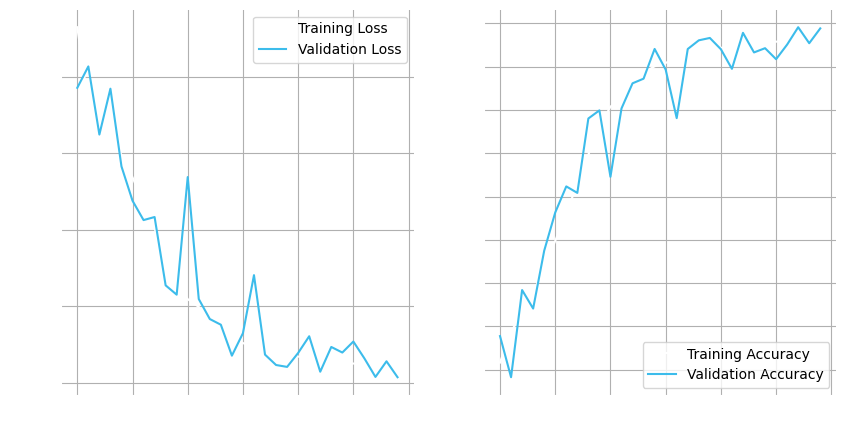

In [102]:
model7 = tf.keras.Sequential([
      tf.keras.layers.Input(shape=(48, 48,1)),

    tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), padding="valid", activation="relu"),
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), padding="valid", activation="relu"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Dropout(0.4),

    tf.keras.layers.Conv2D(filters=128, kernel_size=(3, 3), padding="valid", activation="relu"),
    tf.keras.layers.Conv2D(filters=128, kernel_size=(3, 3), padding="valid", activation="relu"),
   tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Dropout(0.4),

   

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation="relu"),
    tf.keras.layers.Dense(7, activation="softmax")
])

model7 = modeling(model7,"model7.png",train_dataset,val_dataset,epoch)

## TESTOWANIE

In [105]:
test_loss,test_accuracy = model7.evaluate(val_dataset)
from IPython.display import Markdown

Markdown(f"## Test loss: {test_loss: .2f} \n ## Test accuracy {test_accuracy: .2f}")

198/198 ━━━━━━━━━━━━━━━━━━━━ 15s 75ms/step - accuracy: 0.9876 - loss: 0.0405


## Test loss:  0.04 
 ## Test accuracy  0.99